In [100]:
# TODO:
# sensitivity analysis built in
# confounder vector importance
# masking actual text ?
# ensemble generation model predictions for a single dataset to get a range of predicted outcomes and ITEs for each patient? 
# ensemble evaluation model predictions to get a range of predicted outcomes and ITEs for each patient?

In [2]:
from pathlib import Path
import os
import pandas as pd


In [23]:
temp = pd.read_parquet('../pcori_experiments/rethink_confounders_real_data/experiments_1-5-26/exp01_baseline/results/applied_inference/predictions.parquet')

In [24]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   dfci_mrn             1473 non-null   int64         
 1   clinical_text        1473 non-null   object        
 2   date                 1473 non-null   datetime64[ns]
 3   split                1473 non-null   object        
 4   outcome_indicator    1473 non-null   int64         
 5   treatment_indicator  1473 non-null   int64         
 6   y0_pred              1473 non-null   float32       
 7   y1_pred              1473 non-null   float32       
 8   ite_pred             1473 non-null   float32       
 9   propensity_pred      1473 non-null   float32       
 10  cv_fold              1473 non-null   int64         
dtypes: datetime64[ns](1), float32(4), int64(4), object(2)
memory usage: 103.7+ KB


In [26]:
#temp[['true_treatment_logit','true_outcome_logit','outcome_logit_0','outcome_logit_1','y0_pred','y1_pred', 'propensity_pred', 'ite_pred','true_ite']].head()
temp[['y0_pred','y1_pred', 'propensity_pred', 'ite_pred']].head()


,y0_pred,y1_pred,propensity_pred,ite_pred
0,-0.446975,-0.731896,0.077174,-0.284921
1,-0.728410,-0.859976,0.569032,-0.131566
2,-0.446585,-0.736221,0.029691,-0.289636
3,-0.489496,-0.702018,0.239529,-0.212522
4,-0.543758,-0.990346,0.695362,-0.446588


In [9]:
import numpy as np
np.min(temp.outcome_logit_0)

np.float64(-7.016831356736601)

/tmp/ipykernel_365421/561460952.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(temp.y0_pred)


<Axes: xlabel='y0_pred', ylabel='Density'>

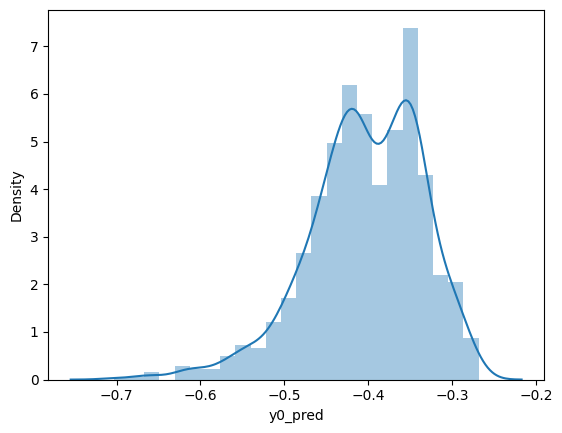

In [11]:
import seaborn as sns
sns.distplot(temp.y0_pred)

In [20]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(temp.outcome_indicator, temp.y1_pred)

0.5104300115741763

In [29]:
roc_auc_score(temp.treatment_indicator, temp.propensity_pred)

0.5884408612378297

In [16]:
print(temp.clinical_text.sample(n=1).iloc[0])

**Initial Oncology Consultation Note – 2024‑10‑01**  
**Patient:** 74‑year‑old female (DOB: 1950‑03‑12)  
**Chief Complaint:** Progressive dyspnea and new onset bone pain (lumbar region) for ~3 weeks.  

**History of Present Illness:**  
The patient was diagnosed with stage II (pT2N0) ER‑positive, PR‑positive, HER2‑negative invasive ductal carcinoma of the left breast 2 years ago. She completed definitive breast‑conserving surgery followed by adjuvant radiation (total 60 Gy) and a 5‑year course of letrozole, which was stopped at the end of the treatment period. She remained disease‑free until approximately 3 months prior to this visit, when routine surveillance CT of the chest/abdomen/pelvis demonstrated new sclerotic lesions in the lumbar vertebrae and a 2.3 cm hypodense lesion in segment IV of the liver. She reports mild fatigue, ECOG performance status now 2 (requires occasional assistance for ADLs), and intermittent low‑grade fevers.  

**Past Medical History:**  
- Hypertension (w

In [106]:

folder = Path("./cdt_refactored_results/plasmode_experiments/simulated_datasets")

parquet_files = sorted(p for p in folder.iterdir() if p.is_file() and p.suffix.lower() == ".parquet")

# Read and concatenate (handles differing columns by union)
frames = [pd.read_parquet(f) for f in parquet_files]
all_df = pd.concat(frames, ignore_index=True, sort=False) if frames else pd.DataFrame()

# all_df now contains all rows from all simulations


In [107]:
len(frames)

50

In [108]:
frames[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dfci_mrn              295 non-null    int64         
 1   clinical_text         295 non-null    object        
 2   date                  295 non-null    datetime64[ns]
 3   split                 295 non-null    object        
 4   outcome_indicator     295 non-null    int64         
 5   treatment_indicator   295 non-null    int64         
 6   true_ite              295 non-null    float64       
 7   true_y0_logit         295 non-null    float64       
 8   true_y1_logit         295 non-null    float64       
 9   sim_split             295 non-null    object        
 10  estimated_ite         295 non-null    float32       
 11  estimated_y0_logit    295 non-null    float32       
 12  estimated_y1_logit    295 non-null    float32       
 13  estimated_propensity

In [109]:
import numpy as np
corrs = [np.corrcoef(x.true_ite, x.estimated_ite)[0,1] for x in frames]
    

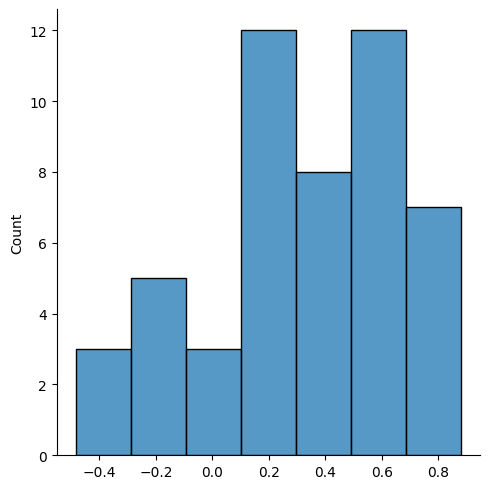

In [110]:
import seaborn as sns
sns.displot(corrs)

/tmp/ipykernel_993545/3687428316.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(slopes)


<Axes: ylabel='Density'>

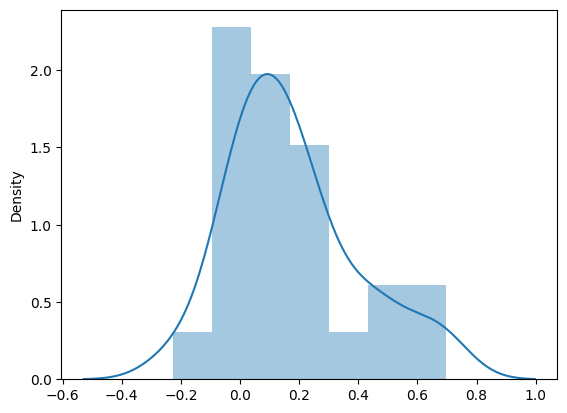

In [111]:
slopes = [np.polyfit(x.true_ite, x.estimated_ite, 1)[0] for x in frames]
sns.distplot(slopes)

In [112]:
np.mean(slopes)

np.float64(0.1777612265053424)

<Axes: xlabel='true_ite', ylabel='estimated_ite'>

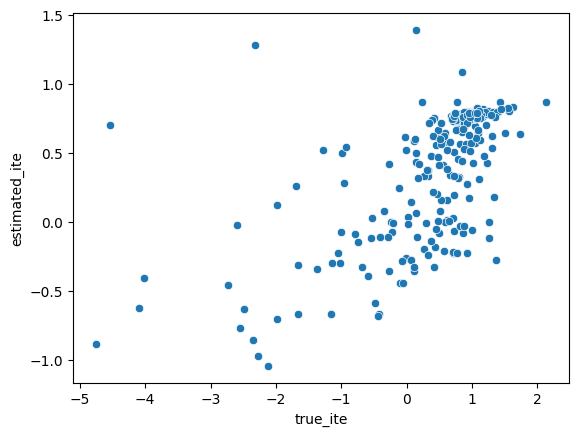

In [122]:
import random
i = random.randint(0, len(frames))
sns.scatterplot(x=frames[i].true_ite, y=frames[i].estimated_ite)

In [114]:
np.mean(frames[i].true_ite)

np.float64(0.5000000000000001)

In [115]:
np.mean(frames[i].estimated_ite)

np.float32(0.52058077)

In [116]:
i

42

In [117]:
frames[0][['estimated_y0_logit','estimated_y1_logit', 'true_y0_logit','true_y1_logit', 'estimated_propensity', 'estimated_ite','true_ite','sim_split']].head()

,estimated_y0_logit,estimated_y1_logit,true_y0_logit,true_y1_logit,estimated_propensity,estimated_ite,true_ite,sim_split
0,-2.432299,-2.527193,-2.303949,-2.380655,0.735416,-0.094893,-0.076705,eval
1,-1.860174,-1.782032,-0.940043,-0.008754,0.725754,0.078142,0.931289,eval
2,-1.857380,-1.639680,-1.579496,-0.637905,0.555780,0.217700,0.941592,eval
3,-2.400430,-2.454318,-2.211955,-1.913340,0.692283,-0.053889,0.298616,eval
4,-1.788680,0.115723,-1.095776,-2.268999,0.081647,1.904404,-1.173223,eval


<Axes: xlabel='estimated_y1_logit', ylabel='true_y1_logit'>

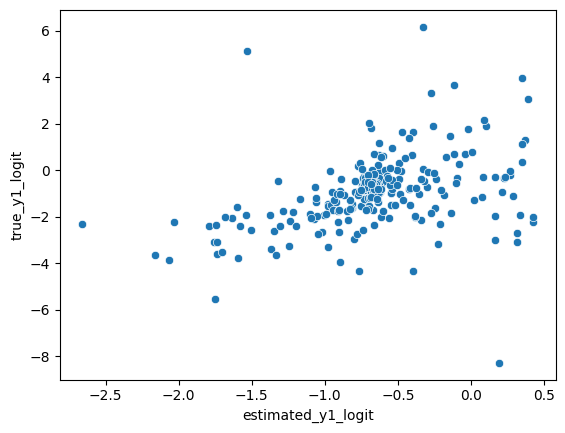

In [105]:
sns.scatterplot(x=frames[7].estimated_y1_logit, y=frames[7].true_y1_logit)

<Axes: xlabel='estimated_y1_logit', ylabel='estimated_y0_logit'>

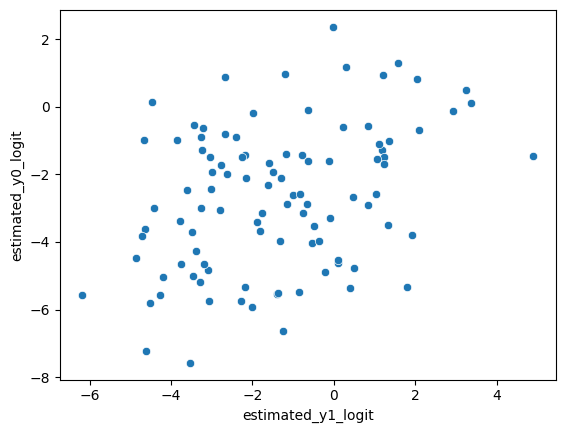

In [78]:
sns.scatterplot(x=frames[3].estimated_y1_logit, y=frames[3].estimated_y0_logit)

In [55]:
np.min(frames[0].estimated_y0_logit.value_counts())

np.int64(1)

In [25]:
frames[0].estimated_y1_logit.value_counts()

estimated_y1_logit
-0.400533    2
-0.400860    2
-0.400911    2
-0.400887    2
-0.400927    2
            ..
-0.400876    1
-0.399435    1
-0.400913    1
-0.400960    1
-0.400872    1
Name: count, Length: 1152, dtype: int64

/tmp/ipykernel_125858/2247398303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(frames[0].estimated_y0_logit)


<Axes: xlabel='estimated_y0_logit', ylabel='Density'>

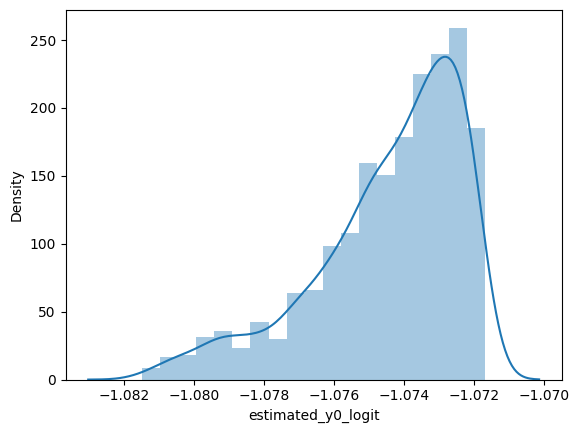

In [56]:
sns.distplot(frames[0].estimated_y0_logit)

In [34]:
import torch


In [37]:
torch.sigmoid(torch.tensor(-2.1056))

tensor(0.1086)

In [14]:
?sns.scatterplot

Signature:
sns.scatterplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Draw a scatter plot with possibility of several semantic groupings.

The relationship between `x` and `y` can be shown for different subsets
of the data using the `hue`, `size`, and `style` parameters. These
parameters control what visual semantics are used to identify the different
subsets. It is possible to show up to three dimensions independently by
using all three semantic types, but this style of plot can be hard to
interpret and is often ineffective. Using redundant semantics (i.e. both
`hue` and `style` for the same variable) can be helpful for making
graphics more accessible.

See the :ref:`tutorial <relational_tutorial>` for more information.

The de

In [5]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6424 entries, 0 to 6423
Data columns (total 85 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   seed                                           6424 non-null   int64  
 1   n_train                                        6424 non-null   int64  
 2   n_val                                          6424 non-null   int64  
 3   pretrain_enabled                               6424 non-null   bool   
 4   pretrain_used                                  6424 non-null   bool   
 5   pretrain_pretrain_dataset_path                 6424 non-null   object 
 6   pretrain_treatment_column                      6424 non-null   object 
 7   pretrain_dragonnet_representation_dim          6424 non-null   int64  
 8   pretrain_embedding_model_name                  6424 non-null   object 
 9   pretrain_aggregator_mode                       6424 

In [6]:
all_df.plasmode_uplift_hidden_dims.value_counts()

plasmode_uplift_hidden_dims
[]               1632
[64]             1624
[64, 32]         1584
[128, 64, 32]    1584
Name: count, dtype: int64

In [7]:
all_df.gen_aggregator_mode.value_counts()

gen_aggregator_mode
attn    6424
Name: count, dtype: int64

In [8]:
all_df.eval_aggregator_mode.value_counts()

eval_aggregator_mode
attn    6424
Name: count, dtype: int64

In [9]:
import seaborn as sns

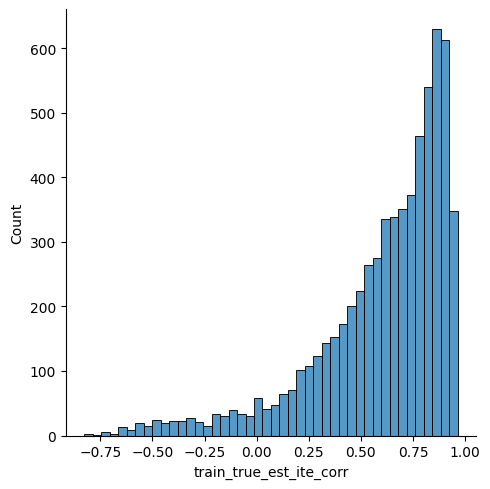

In [10]:
sns.displot(all_df.train_true_est_ite_corr)

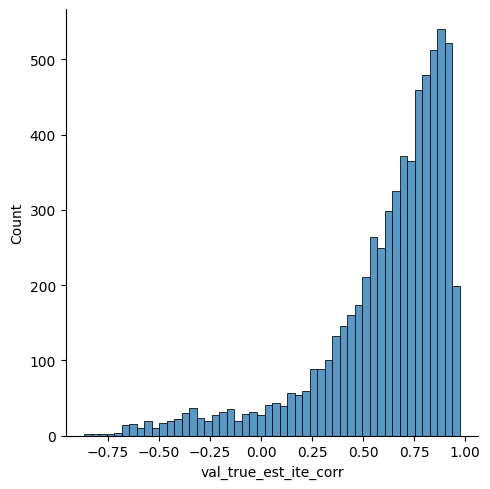

In [11]:
sns.displot(all_df.val_true_est_ite_corr)

In [12]:
import matplotlib.pyplot as plt

(-5.0, 5.0)

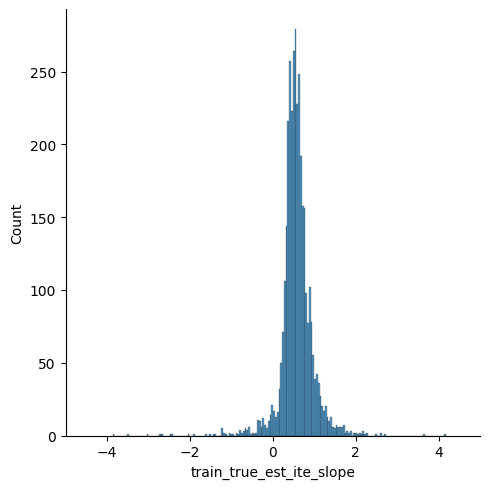

In [13]:
sns.displot(all_df[all_df.pretrain_used].train_true_est_ite_slope)
plt.xlim(-5,5)

(-5.0, 5.0)

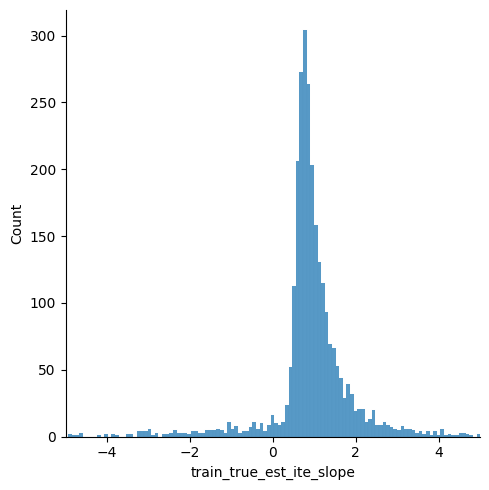

In [14]:
sns.displot(all_df[~all_df.pretrain_used].train_true_est_ite_slope)
plt.xlim(-5,5)

(-5.0, 5.0)

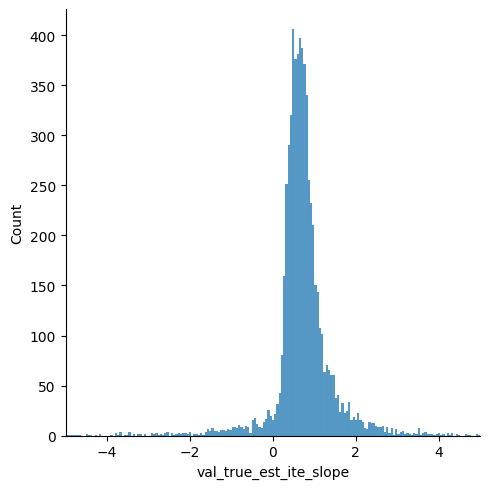

In [15]:
sns.displot(all_df.val_true_est_ite_slope)
plt.xlim(-5,5)

(-5.0, 5.0)

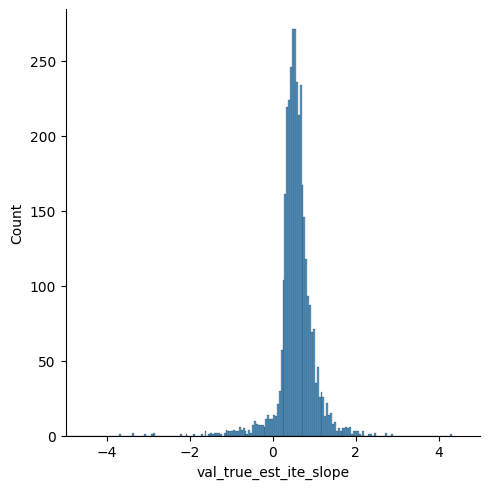

In [16]:
sns.displot(all_df[all_df.pretrain_used].val_true_est_ite_slope)
plt.xlim(-5,5)

(-5.0, 5.0)

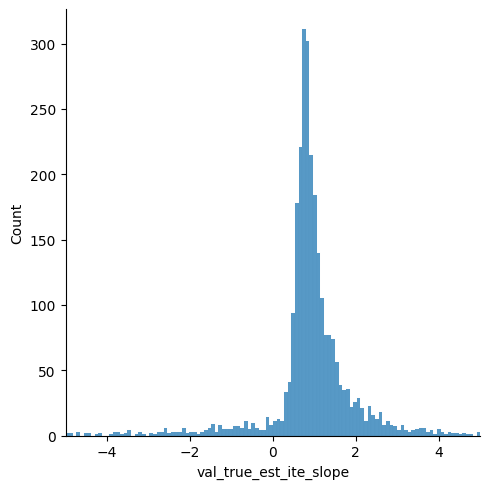

In [17]:
sns.displot(all_df[~all_df.pretrain_used].val_true_est_ite_slope)
plt.xlim(-5,5)

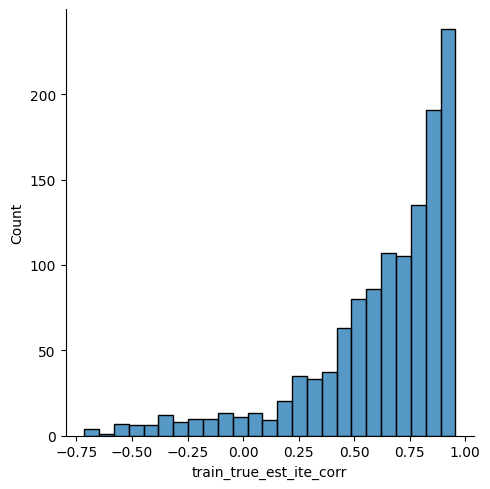

In [18]:
sns.displot(all_df[all_df.plasmode_generation_mode=='gen_y0_sim_uplift'].train_true_est_ite_corr)


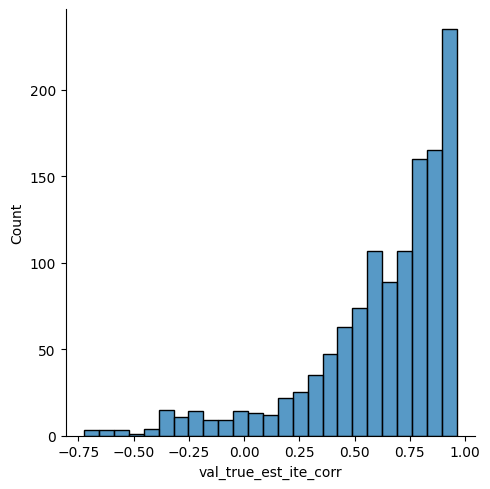

In [19]:
sns.displot(all_df[all_df.plasmode_generation_mode=='gen_y0_sim_uplift'].val_true_est_ite_corr)


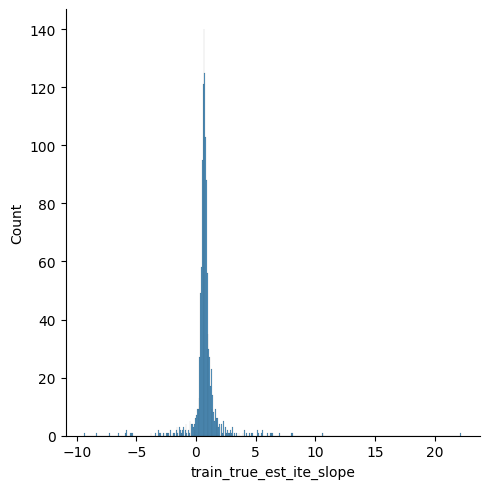

In [20]:
sns.displot(all_df[all_df.plasmode_generation_mode=='gen_y0_sim_uplift'].train_true_est_ite_slope)
#gen_y0_sim_uplift 

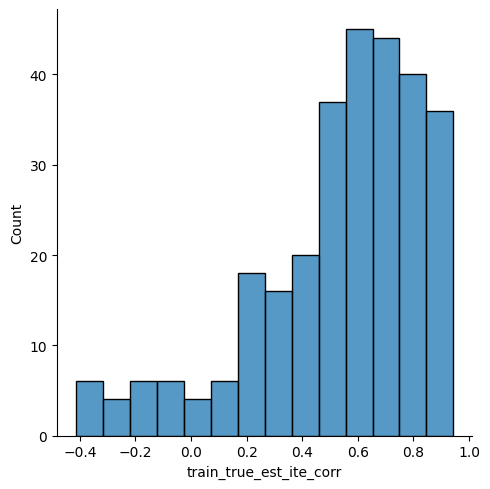

In [21]:
import numpy as np
sns.displot(all_df[np.logical_and(all_df.plasmode_generation_mode=='gen_y0_sim_uplift', all_df.plasmode_uplift_hidden_dims=="[128, 64, 32]")].train_true_est_ite_corr)


In [22]:
# more unmeasured confounding? (fewer latent confounders on eval)
fewer_measureds = all_df[all_df.eval_num_latent_confounders == 20]

In [23]:
fewer_measureds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3212 entries, 0 to 6423
Data columns (total 85 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   seed                                           3212 non-null   int64  
 1   n_train                                        3212 non-null   int64  
 2   n_val                                          3212 non-null   int64  
 3   pretrain_enabled                               3212 non-null   bool   
 4   pretrain_used                                  3212 non-null   bool   
 5   pretrain_pretrain_dataset_path                 3212 non-null   object 
 6   pretrain_treatment_column                      3212 non-null   object 
 7   pretrain_dragonnet_representation_dim          3212 non-null   int64  
 8   pretrain_embedding_model_name                  3212 non-null   object 
 9   pretrain_aggregator_mode                       3212 non-n

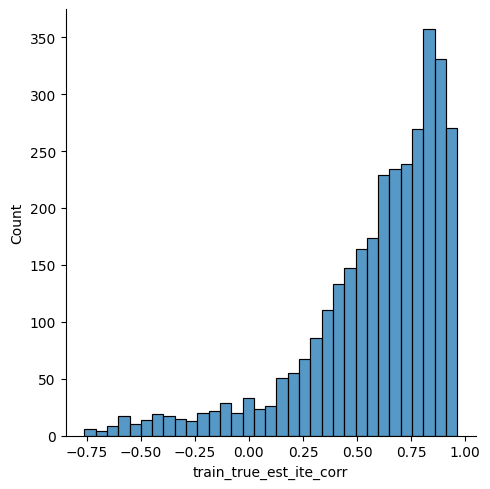

In [24]:
sns.displot(fewer_measureds.train_true_est_ite_corr)

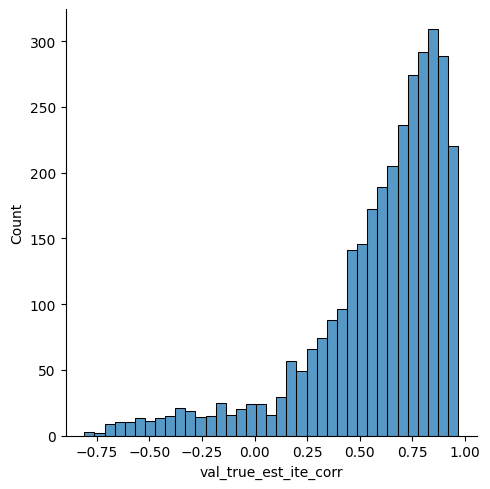

In [25]:
sns.displot(fewer_measureds.val_true_est_ite_corr)

In [26]:
import matplotlib.pyplot as plt

(-5.0, 5.0)

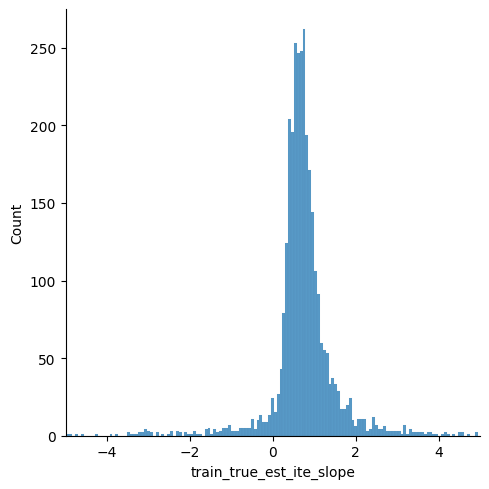

In [27]:
sns.displot(fewer_measureds.train_true_est_ite_slope)
plt.xlim(-5,5)

(-5.0, 5.0)

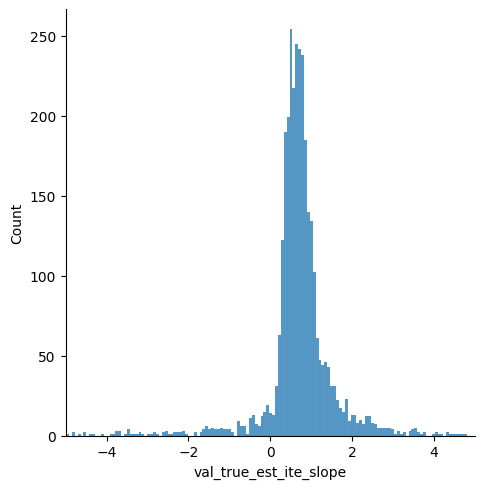

In [28]:
sns.displot(fewer_measureds.val_true_est_ite_slope)
plt.xlim(-5,5)

In [29]:
# subgroup by plasmode generation mode
plasmode_linear = all_df[all_df.plasmode_generation_mode == 'phi_linear']
plasmode_linear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344 entries, 5 to 6422
Data columns (total 85 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   seed                                           1344 non-null   int64  
 1   n_train                                        1344 non-null   int64  
 2   n_val                                          1344 non-null   int64  
 3   pretrain_enabled                               1344 non-null   bool   
 4   pretrain_used                                  1344 non-null   bool   
 5   pretrain_pretrain_dataset_path                 1344 non-null   object 
 6   pretrain_treatment_column                      1344 non-null   object 
 7   pretrain_dragonnet_representation_dim          1344 non-null   int64  
 8   pretrain_embedding_model_name                  1344 non-null   object 
 9   pretrain_aggregator_mode                       1344 non-n

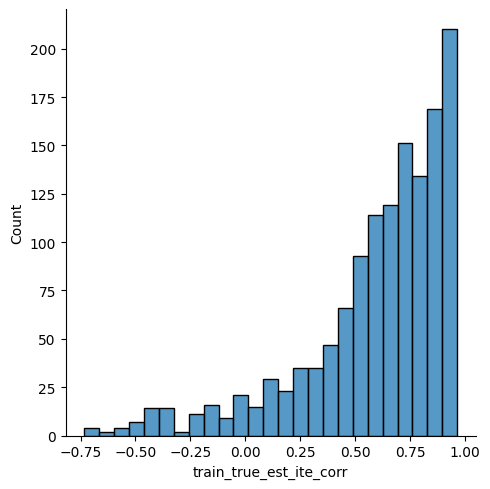

In [30]:
sns.displot(plasmode_linear.train_true_est_ite_corr)

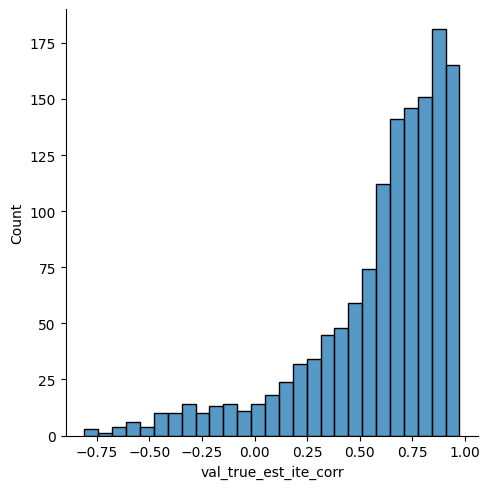

In [31]:
sns.displot(plasmode_linear.val_true_est_ite_corr)

In [32]:
import matplotlib.pyplot as plt

(-5.0, 5.0)

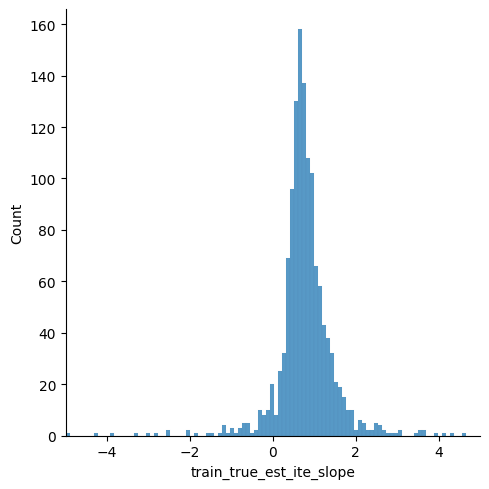

In [33]:
sns.displot(plasmode_linear.train_true_est_ite_slope)
plt.xlim(-5,5)

(-5.0, 5.0)

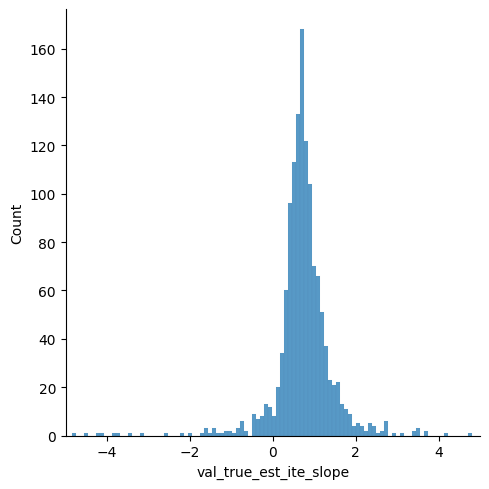

In [34]:
sns.displot(plasmode_linear.val_true_est_ite_slope)
plt.xlim(-5,5)

In [35]:
# try nonlinear


In [36]:
# subgroup by plasmode generation mode
plasmode_nonlinear = all_df[all_df.plasmode_generation_mode == 'phi_nonlinear']
plasmode_nonlinear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344 entries, 1 to 6423
Data columns (total 85 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   seed                                           1344 non-null   int64  
 1   n_train                                        1344 non-null   int64  
 2   n_val                                          1344 non-null   int64  
 3   pretrain_enabled                               1344 non-null   bool   
 4   pretrain_used                                  1344 non-null   bool   
 5   pretrain_pretrain_dataset_path                 1344 non-null   object 
 6   pretrain_treatment_column                      1344 non-null   object 
 7   pretrain_dragonnet_representation_dim          1344 non-null   int64  
 8   pretrain_embedding_model_name                  1344 non-null   object 
 9   pretrain_aggregator_mode                       1344 non-n

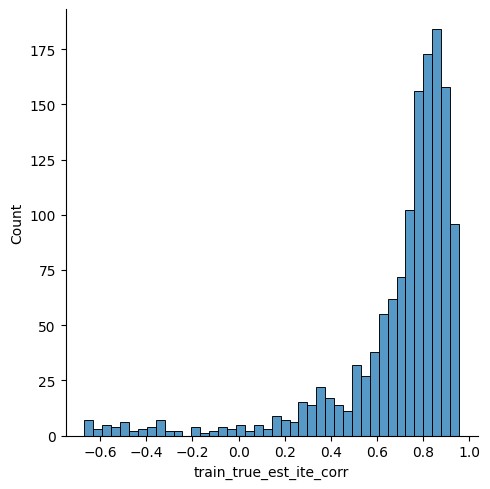

In [37]:
sns.displot(plasmode_nonlinear.train_true_est_ite_corr)

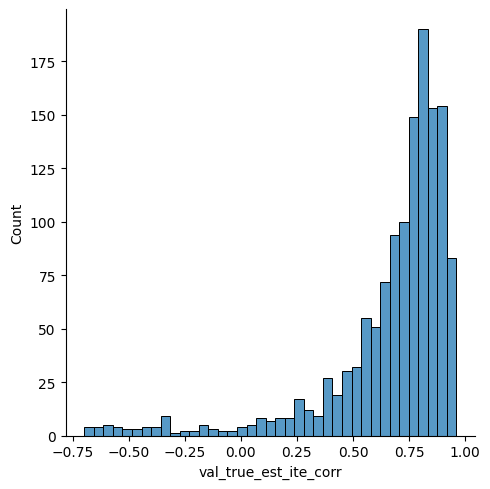

In [38]:
sns.displot(plasmode_nonlinear.val_true_est_ite_corr)

In [39]:
import matplotlib.pyplot as plt

(-5.0, 5.0)

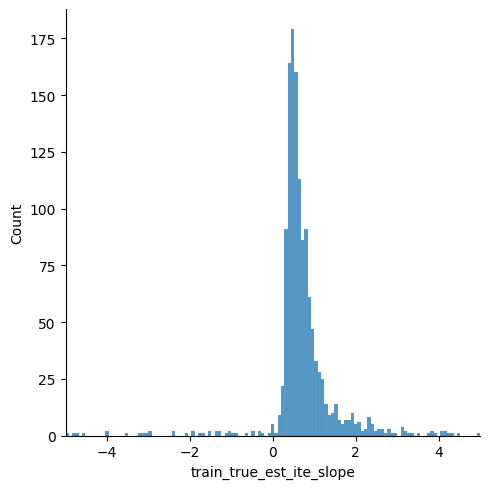

In [40]:
sns.displot(plasmode_nonlinear.train_true_est_ite_slope)
plt.xlim(-5,5)

(-5.0, 5.0)

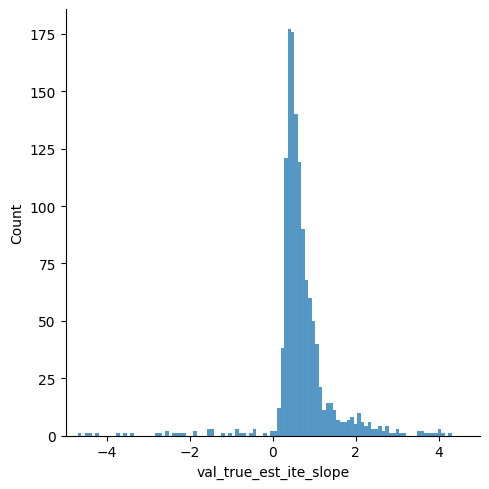

In [41]:
sns.displot(plasmode_nonlinear.val_true_est_ite_slope)
plt.xlim(-5,5)

In [42]:
# subgroup by plasmode generation mode
plasmode_conf = all_df[all_df.plasmode_generation_mode == 'conf_activation']
plasmode_conf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1344 entries, 2 to 6414
Data columns (total 85 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   seed                                           1344 non-null   int64  
 1   n_train                                        1344 non-null   int64  
 2   n_val                                          1344 non-null   int64  
 3   pretrain_enabled                               1344 non-null   bool   
 4   pretrain_used                                  1344 non-null   bool   
 5   pretrain_pretrain_dataset_path                 1344 non-null   object 
 6   pretrain_treatment_column                      1344 non-null   object 
 7   pretrain_dragonnet_representation_dim          1344 non-null   int64  
 8   pretrain_embedding_model_name                  1344 non-null   object 
 9   pretrain_aggregator_mode                       1344 non-n

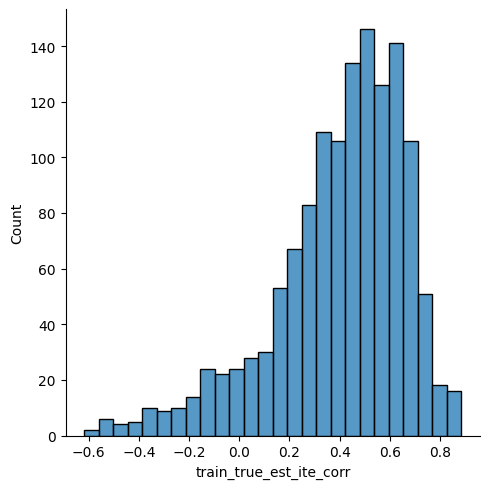

In [43]:
sns.displot(plasmode_conf.train_true_est_ite_corr)

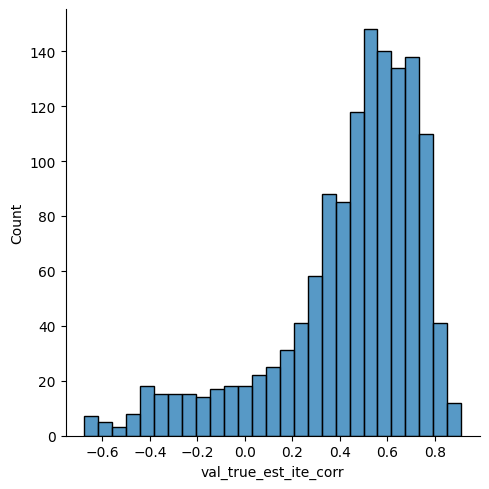

In [44]:
sns.displot(plasmode_conf.val_true_est_ite_corr)

In [45]:
import matplotlib.pyplot as plt

(-5.0, 5.0)

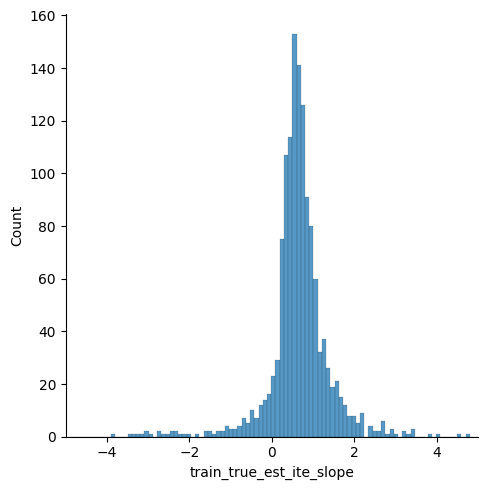

In [46]:
sns.displot(plasmode_conf.train_true_est_ite_slope)
plt.xlim(-5,5)

(-5.0, 5.0)

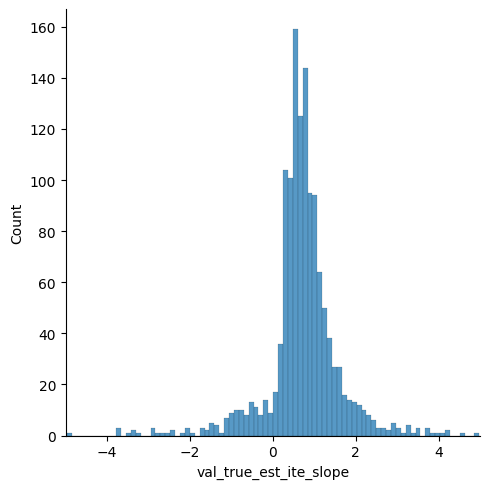

In [47]:
sns.displot(plasmode_conf.val_true_est_ite_slope)
plt.xlim(-5,5)